In [1]:
import pandas as pd
import numpy as np
import mido
from mido import Message, MidiFile, MidiTrack

In [2]:
mid = mido.MidiFile('Classical_Gas.mid', clip = True)

## Data Exploration

Velocity : Force at which the note is played. A velocity of 0 is equivalent to a _Note Off_ message, or rest period.

Note = Corresponds to one of 12 notes by 11 octaves (12x11), starting at 0 and stopping at 127 notes. 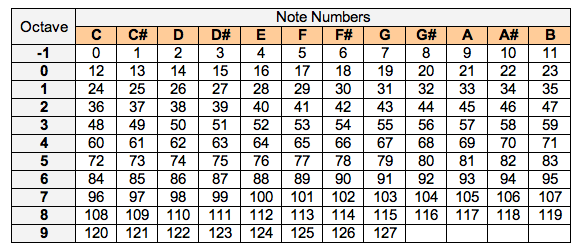

Time = ?

##### Musical Data indexing through tracks

In [224]:
for msg in mid.tracks[2]:
    print(msg)

<meta message midi_port port=0 time=0>
<meta message track_name name='WinJammer Demo' time=0>
program_change channel=1 program=24 time=0
control_change channel=1 control=7 value=127 time=0
control_change channel=1 control=10 value=32 time=0
pitchwheel channel=1 pitch=0 time=0
note_on channel=1 note=45 velocity=127 time=0
note_on channel=1 note=60 velocity=127 time=0
note_on channel=1 note=57 velocity=127 time=48
note_on channel=1 note=60 velocity=0 time=46
note_on channel=1 note=60 velocity=127 time=2
note_on channel=1 note=60 velocity=0 time=46
note_on channel=1 note=57 velocity=0 time=0
note_on channel=1 note=45 velocity=0 time=0
note_on channel=1 note=55 velocity=127 time=2
note_on channel=1 note=43 velocity=127 time=0
note_on channel=1 note=59 velocity=127 time=0
note_on channel=1 note=43 velocity=0 time=94
note_on channel=1 note=42 velocity=127 time=2
note_on channel=1 note=42 velocity=0 time=22
note_on channel=1 note=40 velocity=127 time=2
note_on channel=1 note=59 velocity=0 tim

In [128]:
for item,item_2 in zip(notes,vel):
    print(item,item_2)

45 127
60 127
57 127
60 0
60 127
60 0
57 0
45 0
55 127
43 127
59 127
43 0
42 127
42 0
40 127
59 0
55 0
55 127
59 127
55 0
57 127
57 0
55 127
55 0
59 0
40 0
52 127
45 127
57 127
57 0
45 0
52 0


In [355]:
for item in mid.tracks[0]:
    print(item)

<meta message midi_port port=0 time=0>
<meta message track_name name='WinJammer Demo' time=0>
program_change channel=1 program=24 time=0
control_change channel=1 control=7 value=127 time=0
control_change channel=1 control=10 value=32 time=0
pitchwheel channel=1 pitch=0 time=0
note_on channel=1 note=45 velocity=127 time=0
note_on channel=1 note=60 velocity=127 time=0
note_on channel=1 note=57 velocity=127 time=48
note_on channel=1 note=60 velocity=0 time=46
note_on channel=1 note=60 velocity=127 time=2
note_on channel=1 note=60 velocity=0 time=46
note_on channel=1 note=57 velocity=0 time=0
note_on channel=1 note=45 velocity=0 time=0
note_on channel=1 note=55 velocity=127 time=2
note_on channel=1 note=43 velocity=127 time=0
note_on channel=1 note=59 velocity=127 time=0
note_on channel=1 note=43 velocity=0 time=94
note_on channel=1 note=42 velocity=127 time=2
note_on channel=1 note=42 velocity=0 time=22
note_on channel=1 note=40 velocity=127 time=2
note_on channel=1 note=59 velocity=0 tim

note_on channel=1 note=64 velocity=0 time=23
note_on channel=1 note=62 velocity=127 time=1
note_on channel=1 note=62 velocity=0 time=23
note_on channel=1 note=55 velocity=0 time=0
note_on channel=1 note=52 velocity=127 time=1
note_on channel=1 note=57 velocity=127 time=0
note_on channel=1 note=60 velocity=127 time=0
note_on channel=1 note=60 velocity=0 time=47
note_on channel=1 note=57 velocity=0 time=0
note_on channel=1 note=62 velocity=127 time=1
note_on channel=1 note=52 velocity=0 time=23
note_on channel=1 note=52 velocity=127 time=1
note_on channel=1 note=62 velocity=0 time=23
note_on channel=1 note=59 velocity=127 time=1
note_on channel=1 note=59 velocity=0 time=23
note_on channel=1 note=60 velocity=127 time=1
note_on channel=1 note=60 velocity=0 time=23
note_on channel=1 note=59 velocity=127 time=1
note_on channel=1 note=59 velocity=0 time=23
note_on channel=1 note=57 velocity=127 time=1
note_on channel=1 note=57 velocity=0 time=23
note_on channel=1 note=52 velocity=0 time=0
not

In [3]:
num_of_notes = 96
num_of_measures = 32
def midi_to_vectors(name):
    
    mid = MidiFile(name)
    ticks_per_beat = mid.ticks_per_beat
    ticks_per_measure = 4 * ticks_per_beat
    all_notes = {}
    
    for i, track in enumerate(mid.tracks):
        abs_time = 0
        for msg in track:
            if msg.type == 'time_signature':
                tpm = msg.numerator * ticks_per_measure / msg.denominator
                ticks_per_measure = tpm
            abs_time += msg.time
            if msg.type == "note_on" or msg.type== "note_off":
                note =  msg.note
                if note in all_notes:
                    complete_note = all_notes[note][-1]
                    if len(complete_note) == 1:
                        complete_note.append(complete_note[0] + 1)
                else:
                    all_notes[note] = []
                all_notes[note].append([abs_time])
    for note in all_notes:
        if len(all_notes[note][-1]) == 1:
            all_notes[note][-1].append(all_notes[note][-1][0] + 1)

    music_vectors = []
    for note in all_notes:
        for complete_note in all_notes[note]:
            start_time = complete_note[0]
            music_vectors.append([start_time,note])
            
    return music_vectors
#def batching(music_vector):
#    size = num_of_measures * 4 * 3
#    while i < len(music_vector) / size:
        

def vectors_to_midi(vector):
    abs_time = mid[-1][0]

In [4]:
mid = midi_to_vectors('Classical_Gas.mid')

In [5]:
mid

[[0, 45],
 [142, 45],
 [432, 45],
 [575, 45],
 [576, 45],
 [719, 45],
 [1056, 45],
 [1199, 45],
 [1248, 45],
 [1295, 45],
 [1920, 45],
 [2015, 45],
 [2016, 45],
 [2111, 45],
 [2496, 45],
 [2567, 45],
 [2568, 45],
 [2639, 45],
 [2640, 45],
 [2687, 45],
 [2688, 45],
 [2783, 45],
 [2784, 45],
 [2879, 45],
 [3264, 45],
 [3335, 45],
 [3336, 45],
 [3407, 45],
 [3408, 45],
 [3455, 45],
 [3456, 45],
 [3551, 45],
 [3552, 45],
 [3647, 45],
 [4032, 45],
 [4103, 45],
 [4104, 45],
 [4175, 45],
 [4176, 45],
 [4223, 45],
 [4224, 45],
 [4319, 45],
 [4320, 45],
 [4415, 45],
 [4800, 45],
 [4895, 45],
 [4992, 45],
 [5063, 45],
 [5664, 45],
 [5759, 45],
 [5856, 45],
 [5927, 45],
 [6120, 45],
 [6191, 45],
 [6480, 45],
 [6575, 45],
 [6576, 45],
 [6623, 45],
 [6648, 45],
 [6743, 45],
 [6816, 45],
 [6863, 45],
 [6864, 45],
 [6959, 45],
 [6960, 45],
 [7007, 45],
 [7248, 45],
 [7343, 45],
 [7344, 45],
 [7391, 45],
 [7560, 45],
 [7607, 45],
 [7704, 45],
 [7727, 45],
 [7728, 45],
 [7799, 45],
 [7872, 45],
 [7943,

In [6]:
mid.sort(key = lambda x: x[0])

In [7]:
mid

[[0, 45],
 [0, 45],
 [0, 45],
 [0, 60],
 [0, 60],
 [0, 60],
 [48, 57],
 [48, 57],
 [48, 57],
 [94, 60],
 [94, 60],
 [94, 60],
 [96, 60],
 [96, 60],
 [96, 60],
 [142, 45],
 [142, 45],
 [142, 45],
 [142, 60],
 [142, 60],
 [142, 60],
 [142, 57],
 [142, 57],
 [142, 57],
 [144, 55],
 [144, 55],
 [144, 55],
 [144, 43],
 [144, 43],
 [144, 43],
 [144, 59],
 [144, 59],
 [144, 59],
 [238, 43],
 [238, 43],
 [238, 43],
 [240, 42],
 [240, 42],
 [240, 42],
 [262, 42],
 [262, 42],
 [262, 42],
 [264, 40],
 [264, 40],
 [264, 40],
 [286, 55],
 [286, 55],
 [286, 55],
 [286, 59],
 [286, 59],
 [286, 59],
 [288, 55],
 [288, 55],
 [288, 55],
 [288, 59],
 [288, 59],
 [288, 59],
 [335, 55],
 [335, 55],
 [335, 55],
 [336, 57],
 [336, 57],
 [336, 57],
 [383, 57],
 [383, 57],
 [383, 57],
 [384, 55],
 [384, 55],
 [384, 55],
 [431, 55],
 [431, 55],
 [431, 55],
 [431, 59],
 [431, 59],
 [431, 59],
 [431, 40],
 [431, 40],
 [431, 40],
 [432, 45],
 [432, 45],
 [432, 45],
 [432, 57],
 [432, 57],
 [432, 57],
 [432, 52],
 

In [423]:
mid[-1][0]

21172

In [403]:
len(music_vectors) / (num_of_measures * 4 *3 )

4.609375

In [357]:
print(abs_time/mid.ticks_per_beat/4)

110.25


In [406]:
mid.length

220.54166666666657

In [411]:
for item, item_2 in mid:
    message_pr

0.0 45
0.7395833333333334 45
2.25 45
2.9947916666666665 45
3.0 45
3.7447916666666665 45
5.5 45
6.244791666666667 45
6.5 45
6.744791666666667 45
10.0 45
10.494791666666666 45
10.5 45
10.994791666666666 45
13.0 45
13.369791666666666 45
13.375 45
13.744791666666666 45
13.75 45
13.994791666666666 45
14.0 45
14.494791666666666 45
14.5 45
14.994791666666666 45
17.0 45
17.369791666666668 45
17.375 45
17.744791666666668 45
17.75 45
17.994791666666668 45
18.0 45
18.494791666666668 45
18.5 45
18.994791666666668 45
21.0 45
21.369791666666668 45
21.375 45
21.744791666666668 45
21.75 45
21.994791666666668 45
22.0 45
22.494791666666668 45
22.5 45
22.994791666666668 45
25.0 45
25.494791666666668 45
26.0 45
26.369791666666668 45
29.5 45
29.994791666666668 45
30.5 45
30.869791666666668 45
31.875 45
32.244791666666664 45
33.75 45
34.244791666666664 45
34.25 45
34.494791666666664 45
34.625 45
35.119791666666664 45
35.5 45
35.744791666666664 45
35.75 45
36.244791666666664 45
36.25 45
36.494791666666664 45

101.49479166666667 60
52.25 60
52.625 60
62.5 60
62.619791666666664 60
62.75 60
63.119791666666664 60
63.5 60
63.869791666666664 60
64.5 60
64.61979166666667 60
64.75 60
65.74479166666667 60
66.75 60
67.74479166666667 60
68.75 60
69.74479166666667 60
70.75 60
71.49479166666667 60
74.75 60
74.99479166666667 60
89.25 60
89.49479166666667 60
90.375 60
90.49479166666667 60
90.875 60
90.99479166666667 60
92.75 60
92.99479166666667 60
52.25 60
52.625 60
62.5 60
62.619791666666664 60
62.75 60
63.119791666666664 60
63.5 60
63.869791666666664 60
64.5 60
64.61979166666667 60
64.75 60
65.74479166666667 60
66.75 60
67.74479166666667 60
68.75 60
69.74479166666667 60
70.75 60
71.49479166666667 60
74.75 60
74.99479166666667 60
89.75 60
89.99479166666667 60
90.375 60
90.49479166666667 60
90.875 60
90.99479166666667 60
92.75 60
92.99479166666667 60
0.25 57
0.7395833333333334 57
1.75 57
1.9947916666666667 57
2.25 57
2.9947916666666665 57
3.0 57
3.1197916666666665 57
3.25 57
3.3697916666666665 57
4.75 57

3.75 55
4.494791666666667 55
4.5 55
4.744791666666667 55
5.0 55
5.244791666666667 55
6.333333333333333 55
6.572916666666667 55
6.833333333333333 55
7.229166666666667 55
7.25 55
7.494791666666667 55
11.25 55
11.614583333333334 55
11.625 55
11.989583333333334 55
12.25 55
12.369791666666666 55
15.25 55
15.614583333333334 55
15.625 55
15.989583333333334 55
16.25 55
16.369791666666668 55
19.25 55
19.614583333333332 55
19.625 55
19.989583333333332 55
20.25 55
20.369791666666668 55
23.25 55
23.619791666666668 55
23.625 55
23.994791666666668 55
24.25 55
24.369791666666668 55
25.625 55
25.994791666666668 55
26.5 55
26.869791666666668 55
26.875 55
27.244791666666668 55
27.25 55
27.494791666666668 55
29.375 55
29.494791666666668 55
30.125 55
30.494791666666668 55
31.0 55
31.119791666666668 55
31.375 55
31.494791666666668 55
31.75 55
31.869791666666668 55
32.125 55
32.244791666666664 55
32.5 55
32.619791666666664 55
32.875 55
32.994791666666664 55
39.75 55
39.994791666666664 55
40.0 55
40.36979166

12.75 40
12.994791666666666 40
15.75 40
15.994791666666666 40
16.0 40
16.494791666666668 40
16.5 40
16.744791666666668 40
16.75 40
16.994791666666668 40
19.75 40
19.994791666666668 40
20.0 40
20.494791666666668 40
20.5 40
20.744791666666668 40
20.75 40
20.994791666666668 40
23.75 40
23.994791666666668 40
24.0 40
24.494791666666668 40
24.5 40
24.744791666666668 40
24.75 40
24.994791666666668 40
29.0 40
29.494791666666668 40
33.0 40
33.744791666666664 40
34.4375 40
34.494791666666664 40
36.5 40
36.557291666666664 40
38.4375 40
38.494791666666664 40
72.5 40
72.74479166666667 40
72.75 40
73.24479166666667 40
73.25 40
73.49479166666667 40
73.5 40
73.74479166666667 40
75.75 40
75.99479166666667 40
76.0 40
76.24479166666667 40
76.25 40
76.49479166666667 40
82.0 40
82.24479166666667 40
82.25 40
82.74479166666667 40
82.75 40
82.99479166666667 40
83.0 40
83.24479166666667 40
86.0 40
86.24479166666667 40
86.25 40
86.74479166666667 40
86.75 40
86.99479166666667 40
87.0 40
87.24479166666667 40
91.2

100.75 48
100.86979166666667 48
7.0 48
7.244791666666667 48
27.0 48
27.494791666666668 48
31.5 48
31.869791666666668 48
40.0 48
40.119791666666664 48
64.75 48
65.24479166666667 48
65.25 48
65.74479166666667 48
68.75 48
69.24479166666667 48
69.25 48
69.74479166666667 48
74.75 48
74.99479166666667 48
89.25 48
89.49479166666667 48
92.75 48
92.99479166666667 48
100.75 48
100.86979166666667 48
79.625 48
79.68229166666667 48
109.875 48
109.93229166666667 48
7.0 64
7.369791666666667 64
27.0 64
27.369791666666668 64
31.5 64
31.619791666666668 64
33.125 64
33.244791666666664 64
33.375 64
33.494791666666664 64
33.625 64
33.744791666666664 64
35.375 64
35.619791666666664 64
37.5 64
37.619791666666664 64
40.0 64
40.369791666666664 64
41.125 64
41.494791666666664 64
41.5 64
41.869791666666664 64
41.875 64
42.244791666666664 64
42.25 64
42.619791666666664 64
43.0 64
43.994791666666664 64
55.625 64
55.869791666666664 64
57.0 64
57.494791666666664 64
58.125 64
58.619791666666664 64
60.125 64
60.619791

45.5 68
45.75 68
46.0 68
46.125 68
46.125 68
46.375 68
46.375 68
46.625 68
46.75 68
47.0 68
47.5 68
47.625 68
47.625 68
47.75 68
48.375 68
48.625 68
50.375 68
50.625 68
47.625 68
47.75 68
48.375 68
48.625 68
50.375 68
50.625 68
33.5 71
33.619791666666664 71
33.875 71
33.994791666666664 71
35.875 71
35.994791666666664 71
37.875 71
37.994791666666664 71
76.25 71
76.36979166666667 71
94.25 71
94.36979166666667 71
94.625 71
94.74479166666667 71
96.625 71
96.74479166666667 71
98.625 71
98.74479166666667 71
33.5 71
33.619791666666664 71
33.875 71
33.994791666666664 71
35.875 71
35.994791666666664 71
37.875 71
37.994791666666664 71
76.25 71
76.36979166666667 71
94.25 71
94.36979166666667 71
94.625 71
94.74479166666667 71
96.625 71
96.74479166666667 71
98.625 71
98.74479166666667 71
33.5 71
33.619791666666664 71
33.875 71
33.994791666666664 71
35.875 71
35.994791666666664 71
37.875 71
37.994791666666664 71
76.25 71
76.36979166666667 71
94.25 71
94.36979166666667 71
94.625 71
94.74479166666667 

85.55729166666667 37
86.0 37
86.05729166666667 37
86.5 37
86.55729166666667 37
87.0 37
87.05729166666667 37
87.5 37
87.55729166666667 37
88.0 37
88.05729166666667 37
88.5 37
88.55729166666667 37
89.0 37
89.05729166666667 37
89.5 37
89.55729166666667 37
90.0 37
90.05729166666667 37
90.5 37
90.55729166666667 37
91.0 37
91.05729166666667 37
91.5 37
91.55729166666667 37
92.0 37
92.05729166666667 37
92.5 37
92.55729166666667 37
93.0 37
93.05729166666667 37
93.5 37
93.55729166666667 37
94.0 37
94.05729166666667 37
94.5 37
94.55729166666667 37
95.0 37
95.05729166666667 37
95.5 37
95.55729166666667 37
96.0 37
96.05729166666667 37
96.5 37
96.55729166666667 37
97.0 37
97.05729166666667 37
97.5 37
97.55729166666667 37
98.0 37
98.05729166666667 37
98.5 37
98.55729166666667 37
99.0 37
99.05729166666667 37
99.5 37
99.55729166666667 37
100.0 37
100.05729166666667 37
100.5 37
100.55729166666667 37
101.0 37
101.05729166666667 37
101.5 37
101.55729166666667 37
102.0 37
102.05729166666667 37
102.5 37
102